# Insurance Dataset
## Author
- Liam Upstone-Smith
- 21017958

### Research Question
(Each Jupyter notebook should begin with 
a brief introduction, identifying the
stakeholders and outlining the resrch questions)<br>
......

## Packages

In [6]:
# Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np
import time
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree


## load in data

In [78]:
# Load in Insurance data as panda Dataframe
df = pd.read_csv("insurance-adapted.csv")

## Data Preprocessing

### Remove rows with null values
Because, there are only 3 rows with null values, and those null values are in age which I cannot accuratly predct, I just removed those rows. Although I complely removed these rows, it still left me with over 1300 rows of data to work with.

In [87]:
def remove_null(data):
    print(f"The number of rows and columns: {df.shape}")

    # Checking if there are any empty values
    print("Rows with null values:\n", data.isnull().sum())

    # Dropping the rows with missing values 
    data = data.dropna()
    
    # Checking if there are any empty values
    print("New rows with null values:\n", data.isnull().sum())
    
    return data

# Linear Regression

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Load in data

In [9]:
# Load in Insurance data as panda Dataframe
data = pd.read_csv("insurance-adapted.csv")

## Preprocessing

### Encode Data

In [90]:
# Remove rows with null values
data = remove_null(data)

# Impute missing values in the 'age' column with the median
data['age'] = data['age'].fillna(data['age'].median())

# Encode categorical variables
encoded_data = pd.get_dummies(data, columns=['sex', 'region'], drop_first=True)  # One-hot encode with drop_first=True
encoded_data['smoker'] = encoded_data['smoker'].map({'yes': 1, 'no': 0})  # Binary encoding for smoker

# Display the processed data
encoded_data.head()

The number of rows and columns: (1338, 7)
Rows with null values:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
New rows with null values:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


,age,bmi,children,smoker,charges,sex_male,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0,1,16884.92400,False,False,False,True
1,18.0,33.770,1,0,1725.55230,True,False,True,False
2,28.0,33.000,3,0,4449.46200,True,False,True,False
3,33.0,22.705,0,0,21984.47061,True,True,False,False
4,32.0,28.880,0,0,3866.85520,True,True,False,False


### Split Data

In [13]:
# Separate features and target variable
X = encoded_data.drop(columns='charges')
y = encoded_data['charges']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train Model

In [15]:
# Train a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred = linear_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

# Print out values
print(f"Mean Absolute Error: {mae}")
print(f"\nMean Squared Error: {mse}")
print(f"\nRoot Mean Squared Error: {rmse}")

Mean Absolute Error: 4203.412754261006

Mean Squared Error: 33683329.08874916

Root Mean Squared Error: 5803.734064268379


## Ridge Regression
Ridge Regression is a regularized form of Linear Regression that penalizes large coefficients to prevent overfitting. Smaller alpha values allows the model to act similar to Linear Regression (less regularisation), where as, larger values increase regularisation therefore reducing overfitting but possibly leading to underfitting.

In [21]:
# Define Ridge Regression model
ridge = Ridge()

# Define a grid of alpha values to search over
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100, 1000]}

# Use GridSearchCV to find the best alpha
grid_search = GridSearchCV(ridge, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best model
best_ridge_model = grid_search.best_estimator_

# Use the best model to make predictions
ridge_predictions = best_ridge_model.predict(X_test)

# Evaluate the model
ridge_mae = mean_absolute_error(y_test, ridge_predictions)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_rmse = ridge_mse ** 0.5

print(f"Best alpha: {grid_search.best_params_['alpha']}")
print(f"MAE: {ridge_mae}\nMSE: {ridge_mse}\nRMSE: {ridge_rmse}")

Best alpha: 1
MAE: 4215.680459471409
MSE: 33731832.18247366
RMSE: 5807.911172054343


## Analysis
...

# MLP Neural Network

In [8]:
# Load in Insurance data as panda Dataframe
data = pd.read_csv("insurance-adapted.csv")

## Preprocessing

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separate features and target variable
X = data.drop(columns=['charges'])
y = data['charges']

# Identify categorical and numerical columns
categorical_cols = ['sex', 'smoker', 'region']
numerical_cols = ['age', 'bmi', 'children']

# Define preprocessing steps
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing numerical values
    ('scaler', StandardScaler())  # Scale numerical features
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))  # Encode categorical features
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Check the processed feature dimensions
X_train_processed.shape, X_test_processed.shape

((1070, 8), (268, 8))

## Train Model

In [13]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the neural network regressor
mlp = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=2000, random_state=42)

# Train the model
mlp.fit(X_train_processed, y_train)

# Make predictions on the test set
y_pred = mlp.predict(X_test_processed)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R Squared: {r2}")

MSE: 28327312.829712737
R Squared: 0.8175359466224446


C:\Users\liamj\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


## Hyperparameter Tuning

In [72]:
from sklearn.model_selection import GridSearchCV
import time

#Start timer
start = time.time()

# Define a parameter grid for GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(32,), (64, 32), (128, 64), (128, 64, 32)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs'],
    'learning_rate': ['constant', 'adaptive'],
    'alpha': [0.0001, 0.001, 0.01]  # Regularization parameter
}

# Define the MLPRegressor model
mlp = MLPRegressor(max_iter=2000, random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(mlp, param_grid, scoring='r2', cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_train_processed, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters:\n{best_params}\n")
print(f"Best R Squared score: {best_score}")

# End and print timer
end = time.time()
time_taken = round(end - start, 3)
print(f"Time taken: {time_taken} seconds")

Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best Parameters:
{'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (128, 64, 32), 'learning_rate': 'constant', 'solver': 'adam'}

Best R Squared score: 0.8339239152784311
Time taken: 309.452 seconds


### With Best Parameters

In [70]:
# Define the neural network regressor
mlp = MLPRegressor(**best_params, max_iter=2000, random_state=42)

# Train the model
mlp.fit(X_train_processed, y_train)

# Make predictions on the test set
y_pred = mlp.predict(X_test_processed)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R Squared: {r2}")

MSE: 18587269.636358112
R Squared: 0.8802742575881012


## Visualisations 

### Predicted v True Scatter Plot

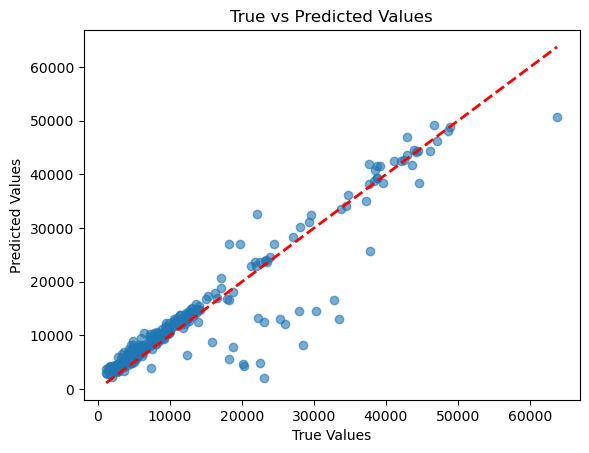

In [50]:
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.show()

### Residuals plot

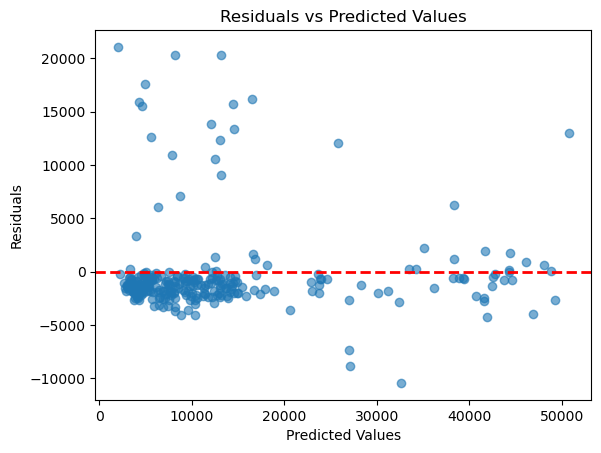

In [52]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

### Distribution of Residuals

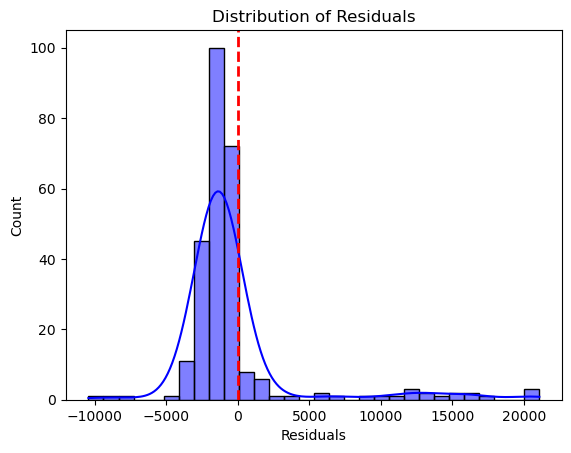

In [55]:
import seaborn as sns

sns.histplot(residuals, kde=True, bins=30, color='blue')
plt.axvline(x=0, color='red', linestyle='--', linewidth=2)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.show()

## Analysis
...

# Comparison
...

# References
-